In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def derivative_x1(x):
    return 2 * (x[0]**5 - 4.2 * x[0]**3 + 4 * x[0] + 0.5 * x[1])

In [3]:
def derivative_x2(x):
    return x[0] + 16 * x[1]**3 - 8 * x[1]

In [4]:
def gradientVector(x):
    return np.array([derivative_x1(x), derivative_x2(x)])

In [5]:
def hessian(x):
    
    matrix = np.array([[10 * x[0]**4 - 25.2 * x[0]**2 + 8, 1],
                        [1, 48 * x[1]**2 - 8]])
    
    return matrix

In [6]:
def inverseHessian(x):
    
    matrix = hessian(x)
    
    det = matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
    invDet = 1 / det
    
    inverseHessian = invDet * np.array([[matrix[1][1], -1 * matrix[0][1]],
                                        [-1 * matrix[1][0], matrix[0][0]]])
    
    return inverseHessian

In [10]:
def direction(x):
    return - inverseHessian(x).dot(gradientVector(x))

In [11]:
def norm(x):
    return np.linalg.norm(x)

Exemplo de plot para futuramente plotar os pontos sobre a funcao original.

In [12]:
def minimizerAndersonKarlos(x1,epslon,maxIte,alpha):
    i=0
    convergenceData = list()
    convergenceData.append(x1)
    while(i<maxIte):
        x1_Old = x1
        x1 = x1 + alpha * direction(x1)
        convergenceData.append(x1)
        if abs(x1_Old[0] - x1[0]) + abs(x1_Old[1] == x1[1]) < epslon:
            break;
    return x1,np.asarray(convergenceData)

def newton(x, err, iterMax):
    
    convergenceData = list()
    print('Ponto inicial: {0}'.format(x))
    print('N° máximo de iterações {0}'.format(iterMax))
    print('Tolerância: {0}'.format(err))
    convergenceData.append(x)
    i = 0
    while True:
        
        xNew = x + 0.1 * direction(x)
        convergenceData.append(xNew)
        #print('Iteração: {0}\nx: {1}\nf(x): {2}'.format(i, xNew, fun(x[0], x[1])))
        
        if (i > iterMax or abs(norm(x) - norm(xNew)) < err):
            break
        
        x = xNew
        i = i + 1
    
    print('Resultado: {0}'.format(xNew))
    print('f(x): {0}'.format(xNew))
    
    return xNew,np.asarray(convergenceData)

def minhaFuncao(x1,x2):
    return (4 - (2.1 * x1**2) + (x1**4 / 3)) * x1**2 + x1 * x2 - 4 * (1 - x2**2) * x2**2

In [13]:
minimizer,convergenceData = newton(np.array([0,1.5]),0.00001,500)
print("The minimizer point is: (%f,%f)" %(minimizer[0],minimizer[1]) )
#abaixo dados sobre os passos realizados até a convergencia
convergenceX = convergenceData[:,0]
convergenceY = convergenceData[:,1]
convergenceZ = minhaFuncao(convergenceX,convergenceY)

Ponto inicial: [ 0.   1.5]
N° máximo de iterações 500
Tolerância: 1e-05
Resultado: [-0.08984708  0.71274021]
f(x): [-0.08984708  0.71274021]
The minimizer point is: (-0.089847,0.712740)


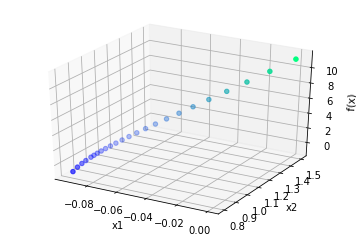

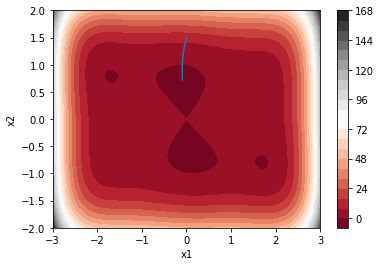

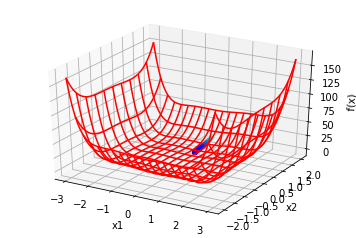

In [15]:
def filtrarConvergencia(x,y,z):
    anterior=z[0]
    convFiltradaX,convFiltradaY,convFiltradaZ = [list(),list(),list()]
    convFiltradaZ.append(anterior)
    convFiltradaX.append(x[0])
    convFiltradaY.append(y[0])
    for i in range(x.size):
        if abs(anterior - z[i]) > 0.1 :
            anterior = z[i]
            convFiltradaZ.append(anterior)
            convFiltradaX.append(x[i])
            convFiltradaY.append(y[i])
    return np.asarray(convFiltradaX),np.asarray(convFiltradaY),np.asarray(convFiltradaZ)

tx,ty,tz = filtrarConvergencia(convergenceX, convergenceY, convergenceZ)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(tx,ty,tz, c=tz,cmap='winter')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel(' f(x) ') #inicial mais claro, final mais escuro
plt.savefig("conv1_0_15",dpi=300)


x = np.linspace(-3,3,100) #definindo dominio
y = np.linspace(-2,2,100)
x,y = np.meshgrid(x, y)   #fazendo uma reformatação para que z possa ser calculado para cada x[i] y[j]
z = minhaFuncao(x,y)


plt.figure(2)
bx=plt.axes()
bx.set_xlabel('x1')
bx.set_ylabel('x2')
plt.contourf(x, y, z, 20, cmap='RdGy',)
plt.plot(convergenceX, convergenceY)
plt.colorbar();
plt.savefig("conv2_0_15",dpi=300)

fig = plt.figure(3)
ax = fig.add_subplot( 111, projection="3d" )

ax.plot_wireframe(x, y, z,rstride=10, cstride=5,color = 'r')
ax.scatter3D(convergenceX, convergenceY, convergenceZ, c=convergenceZ,cmap='winter')
ax.autoscale_view
ax.set_xlabel('x1')
ax.set_ylabel('x2') 
ax.set_zlabel(' f(x) ')

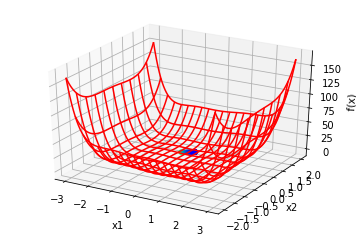

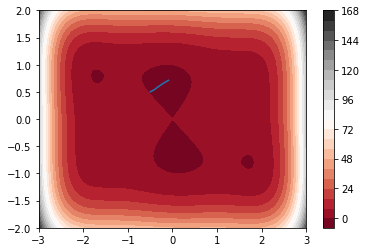

In [80]:
fig = plt.figure()
ax = fig.add_subplot( 111, projection="3d" )

ax.plot_wireframe(x, y, z,rstride=10, cstride=5,color = 'r')
ax.scatter3D(convergenceX, convergenceY, convergenceZ, c=convergenceZ,cmap='winter')
ax.autoscale_view
ax.set_xlabel('x1')
ax.set_ylabel('x2') 
ax.set_zlabel(' f(x) ')

#ax.view_init(elev=30., azim=90)
#for ii in np.arange(0,360,1):            #Comandos para criar 360 imagens rodando
#    ax.view_init(elev=30., azim=ii)
#    plt.savefig("movie%d.png" % ii)